In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset

In [12]:
myntra = pd.read_excel(r"C:\\Users\\Suchana\\Desktop\\temp-myntra\\kids\\Kids.xlsx")

In [13]:
myntra.head(5)

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers
0,Boys Straight Fit Jeans,Rs.769,HERE&NOW,65% OFF,4.2,13
1,Boys Straight Fit Jeans,Rs.769,HERE&NOW,65% OFF,4.5,6
2,Boys Slim Fit Jeans,NaN,H&M,NaN,4.5,2.4k
3,Boys Superstretch Jeans,NaN,H&M,NaN,4.5,2.4k
4,Boys Straight Fit Jeans,Rs.839,HERE&NOW,65% OFF,4.1,240


#### Removing the null values

In [14]:
myntra.shape

(94750, 6)

In [15]:
myntra['Discount'].isnull().sum()

9422

In [16]:
myntra.dropna(inplace=True)

In [17]:
myntra['Discount'].isnull().sum()

0

In [18]:
myntra.shape

(60423, 6)

Here we will divide the dataset into two dataframes i) absolute_discount, which will contain the absolute discount values. and  ii) myntra1 which will contain the discount values.
we will  transform the absolute value of discount to it's discounted form, and concatenate the two dataframes to create teh final dataset.

In [19]:
myntra1 = myntra[~myntra['Discount'].str.contains('Rs')]

In [20]:
absolute_discount= myntra[myntra['Discount'].str.contains('Rs')] 
absolute_discount

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers
11,Boys Slim Fit Jeans,Rs.499,YK,Rs. 500 OFF,4.2,130
64,Boys Slim Fit Jeans,Rs.499,YK,Rs. 500 OFF,4.2,130
74,Boys Slim Fit Jeans,Rs.1299,Pepe Jeans,Rs. 900 OFF,4.1,27
95,Boys Slim Fit Jeans,Rs.1299,Pepe Jeans,Rs. 900 OFF,4.3,84
114,Boys Slim Fit Jeans,Rs.499,YK,Rs. 500 OFF,4.2,130
...,...,...,...,...,...,...
94632,Kids Pack Of 3 Cotton T-shirts,Rs.499,KUCHIPOO,Rs. 1500 OFF,4.5,11
94667,Kids Bio Finish Cotton T-shirt,Rs.329,BAESD,Rs. 1170 OFF,4.4,22
94682,Kids Pack Of 3 Cotton T-shirts,Rs.499,KUCHIPOO,Rs. 1500 OFF,4.5,11
94717,Kids Bio Finish Cotton T-shirt,Rs.329,BAESD,Rs. 1170 OFF,4.4,22


In [21]:
absolute_discount[['Discount','Product Price']]

,Discount,Product Price
11,Rs. 500 OFF,Rs.499
64,Rs. 500 OFF,Rs.499
74,Rs. 900 OFF,Rs.1299
95,Rs. 900 OFF,Rs.1299
114,Rs. 500 OFF,Rs.499
...,...,...
94632,Rs. 1500 OFF,Rs.499
94667,Rs. 1170 OFF,Rs.329
94682,Rs. 1500 OFF,Rs.499
94717,Rs. 1170 OFF,Rs.329


In [22]:
# Remove 'Rs.' from the 'Product Price' column
absolute_discount.loc[:, 'Product Price'] = absolute_discount['Product Price'].str.replace('Rs.', '')

# Remove 'Rs.' from the 'Discount' column
absolute_discount.loc[:, 'Discount'] = absolute_discount['Discount'].str.replace('Rs.', '')

# Remove 'OFF' from the 'Discount' column
absolute_discount.loc[:, 'Discount'] = absolute_discount['Discount'].str.replace('OFF', '')

#### Calculating the actual price of the product

In [23]:
val1= [int(i) for i in absolute_discount['Product Price'].values]
val2 = [int(i) for i in absolute_discount['Discount'].values]
val3= []
#len(val1)
len(val2)
for i in range(len(val1)):
    val3.append(val1[i] + val2[i]) 
print(val3)

[999, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 2199, 999, 2199, 21

In [24]:
len(val3)

3022

In [25]:
absolute_discount['Actual Price']= val3

C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\1527804452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount['Actual Price']= val3


In [26]:
absolute_discount.head(5)

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Actual Price
11,Boys Slim Fit Jeans,499,YK,500,4.2,130,999
64,Boys Slim Fit Jeans,499,YK,500,4.2,130,999
74,Boys Slim Fit Jeans,1299,Pepe Jeans,900,4.1,27,2199
95,Boys Slim Fit Jeans,1299,Pepe Jeans,900,4.3,84,2199
114,Boys Slim Fit Jeans,499,YK,500,4.2,130,999


####  Calculating the discount of products from the actual price and storing it in Discount column

In [27]:
val1= [int(i) for i in absolute_discount['Discount'].values]
val2 = [int(i) for i in absolute_discount['Actual Price'].values]
val3=[]
for i in range(len(val1)):
    val3.append((val1[i] / val2[i]) *100) 
print(val3)

[50.050050050050054, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.92769440654843, 50.050050050050054, 40.92769440654843, 40.927694406

In [28]:
absolute_discount.loc[:,'price %'] = val3

C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\3858670351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.loc[:,'price %'] = val3


In [29]:
absolute_discount.head(5)

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Actual Price,price %
11,Boys Slim Fit Jeans,499,YK,500,4.2,130,999,50.050050
64,Boys Slim Fit Jeans,499,YK,500,4.2,130,999,50.050050
74,Boys Slim Fit Jeans,1299,Pepe Jeans,900,4.1,27,2199,40.927694
95,Boys Slim Fit Jeans,1299,Pepe Jeans,900,4.3,84,2199,40.927694
114,Boys Slim Fit Jeans,499,YK,500,4.2,130,999,50.050050


In [30]:
absolute_discount.drop(['Discount'], axis=1, inplace=True)
absolute_discount.drop(['Actual Price'], axis=1, inplace=True)

C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\2447155854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.drop(['Discount'], axis=1, inplace=True)
C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\2447155854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.drop(['Actual Price'], axis=1, inplace=True)


In [31]:
absolute_discount.head(2)

,Product Name,Product Price,Product Brand,Product Rating,Verified Buyers,price %
11,Boys Slim Fit Jeans,499,YK,4.2,130,50.05005
64,Boys Slim Fit Jeans,499,YK,4.2,130,50.05005


In [32]:
absolute_discount['Discount']= absolute_discount['price %']

C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\2641971026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount['Discount']= absolute_discount['price %']


In [33]:
absolute_discount.drop(['price %'], axis=1, inplace=True)

C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\549001976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.drop(['price %'], axis=1, inplace=True)


In [34]:
absolute_discount.head(3)

,Product Name,Product Price,Product Brand,Product Rating,Verified Buyers,Discount
11,Boys Slim Fit Jeans,499,YK,4.2,130,50.050050
64,Boys Slim Fit Jeans,499,YK,4.2,130,50.050050
74,Boys Slim Fit Jeans,1299,Pepe Jeans,4.1,27,40.927694


In [35]:
# We convert the discount values to integer to obtain the whole numbers
absolute_discount['Discount'] = absolute_discount['Discount'].astype(int)

C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\3100193220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount['Discount'] = absolute_discount['Discount'].astype(int)


In [36]:
absolute_discount.Discount

11       50
64       50
74       40
95       40
114      50
         ..
94632    75
94667    78
94682    75
94717    78
94732    75
Name: Discount, Length: 3022, dtype: int32

In [37]:
absolute_discount['Discount'] = absolute_discount['Discount'].astype(str) + '% OFF'

C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\2584636706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount['Discount'] = absolute_discount['Discount'].astype(str) + '% OFF'


In [38]:
absolute_discount.head(12)

,Product Name,Product Price,Product Brand,Product Rating,Verified Buyers,Discount
11,Boys Slim Fit Jeans,499,YK,4.2,130,50% OFF
64,Boys Slim Fit Jeans,499,YK,4.2,130,50% OFF
74,Boys Slim Fit Jeans,1299,Pepe Jeans,4.1,27,40% OFF
95,Boys Slim Fit Jeans,1299,Pepe Jeans,4.3,84,40% OFF
114,Boys Slim Fit Jeans,499,YK,4.2,130,50% OFF
124,Boys Slim Fit Jeans,1299,Pepe Jeans,4.1,27,40% OFF
145,Boys Slim Fit Jeans,1299,Pepe Jeans,4.3,84,40% OFF
164,Boys Slim Fit Jeans,499,YK,4.2,130,50% OFF
174,Boys Slim Fit Jeans,1299,Pepe Jeans,4.1,27,40% OFF
195,Boys Slim Fit Jeans,1299,Pepe Jeans,4.3,84,40% OFF


In [39]:
absolute_discount.shape

(3022, 6)

In [40]:
myntra.shape

(60423, 6)

In [41]:
myntra1.shape

(57401, 6)

In [42]:
# Concatenate vertically
result = pd.concat([myntra1, absolute_discount], axis=0)

In [43]:
result.shape # the number of rows remains same as the original myntra dataset.

(60423, 6)

###  Exploratory Data Anlysis on the result dataset.

In [44]:
result.head(5)

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers
0,Boys Straight Fit Jeans,Rs.769,HERE&NOW,65% OFF,4.2,13
1,Boys Straight Fit Jeans,Rs.769,HERE&NOW,65% OFF,4.5,6
4,Boys Straight Fit Jeans,Rs.839,HERE&NOW,65% OFF,4.1,240
6,Boys Slim Fit Mid-Rise Jeans,Rs.1059,U.S. Polo Assn. Kids,47% OFF,4.3,61
7,Boys Stretchable Jeans,Rs.764,MINI KLUB,15% OFF,4.4,9


In [45]:
result.isnull().sum()

Product Name       0
Product Price      0
Product Brand      0
Discount           0
Product Rating     0
Verified Buyers    0
dtype: int64

In [47]:
result['Product Price']=result['Product Price'].str.replace('Rs.','')

In [48]:
result['Product Price'].values

array(['769', '769', '839', ..., '499', '329', '499'], dtype=object)

In [49]:
result['Product Price']=result['Product Price'].astype('float')

### Creating custom  Price Range for analysis

In [51]:
price_bins = [0, 500, 1000, 1500,2000,2500,3000, float('inf')]
price_labels = ['0-500', '501-1000', '1001-1500','1501-2000' ,'2001-2500','2501-3000','3001+']

# Assign price range categories
result['Price Range'] = pd.cut(result['Product Price'], bins=price_bins, labels=price_labels)

# Group by price range and calculate average rating
avg_rating_by_price = result.groupby('Price Range')['Product Rating'].mean().reset_index()

# Group by price range and calculate count of ratings
count_ratings_by_price = result.groupby('Price Range')['Product Rating'].count().reset_index()

# Find the price range with the highest average rating
max_avg_rating = avg_rating_by_price.loc[avg_rating_by_price['Product Rating'].idxmax()]

# Find the price range with the highest count of ratings
max_count_ratings = count_ratings_by_price.loc[count_ratings_by_price['Product Rating'].idxmax()]


result.head()

C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\2530613435.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_price = result.groupby('Price Range')['Product Rating'].mean().reset_index()
C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\2530613435.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_ratings_by_price = result.groupby('Price Range')['Product Rating'].count().reset_index()


,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Price Range
0,Boys Straight Fit Jeans,769.0,HERE&NOW,65% OFF,4.2,13,501-1000
1,Boys Straight Fit Jeans,769.0,HERE&NOW,65% OFF,4.5,6,501-1000
4,Boys Straight Fit Jeans,839.0,HERE&NOW,65% OFF,4.1,240,501-1000
6,Boys Slim Fit Mid-Rise Jeans,1059.0,U.S. Polo Assn. Kids,47% OFF,4.3,61,1001-1500
7,Boys Stretchable Jeans,764.0,MINI KLUB,15% OFF,4.4,9,501-1000


### FIND SUM OF VERIFIED BUYERS FOR THE CUSTOM PRICE RANGES

In [52]:
def convert_k_notation(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    return float(value)

# Apply the conversion function to the Verified Buyers column
result['Verified Buyers'] = result['Verified Buyers'].apply(convert_k_notation)


In [53]:
result['Price Range'] = pd.cut(result['Product Price'], bins=price_bins, labels=price_labels)

# Group by price range and calculate the sum of verified buyers
sum_verified_by_price_range = result.groupby('Price Range')['Verified Buyers'].sum().reset_index()

print("Sum of Verified Buyers by Price Range:")
print(sum_verified_by_price_range)

Sum of Verified Buyers by Price Range:
  Price Range  Verified Buyers
0       0-500        3615105.0
1    501-1000        9826151.0
2   1001-1500         772416.0
3   1501-2000          51974.0
4   2001-2500           5016.0
5   2501-3000              0.0
6       3001+              0.0


C:\Users\Suchana\AppData\Local\Temp\ipykernel_17072\2323057440.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_verified_by_price_range = result.groupby('Price Range')['Verified Buyers'].sum().reset_index()


### PRICE RANGE VS SUM OF VERIFIED BUYERS

In [54]:
sum_verified_by_price_range.head()

,Price Range,Verified Buyers
0,0-500,3615105.0
1,501-1000,9826151.0
2,1001-1500,772416.0
3,1501-2000,51974.0
4,2001-2500,5016.0


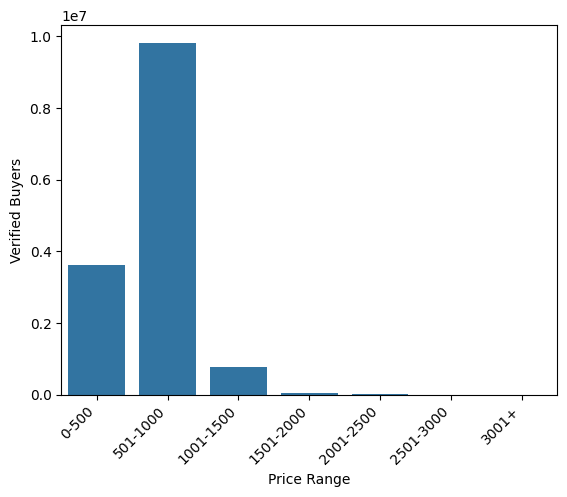

In [55]:
sns.barplot(x=sum_verified_by_price_range['Price Range'],y=sum_verified_by_price_range['Verified Buyers'],data= sum_verified_by_price_range)
plt.title('Graph between Verified Buyers(sales) and Price Range')
plt.xticks(rotation=45, ha = 'right')
plt.show()

CONCLUSION - Maximum buyers prefer  products under 1000, like the men and women customers.  We can see that customers are more inclined in buying cheaper products, diversifying products in this price range will rally help the company attract aand retain customers

### VERIFIED BUYERS VS DISCOUNT RANGE
#### FINDING THE DISCOUNT RANGE IN THE BELOW CELL.

In [56]:
def extract_numeric(discount):
    if 'Rs.' in discount:
        return int(discount.replace('Rs. ', '').replace(' OFF', ''))
    elif '%' in discount:
        return int(discount.replace('% OFF', ''))
    return 0

# Extract numeric values from discount column

result['Discount Value'] = result['Discount'].apply(extract_numeric)

# Calculate percentage discount for absolute result
result.loc[result['Discount'].str.contains('Rs.'), 'Discount Percent'] = (
    result['Discount Value'] / result['Product Price'] * 100
)

# Use the original percentage discounts where applicable
result.loc[result['Discount'].str.contains('%'), 'Discount Percent'] = result['Discount Value']

# Round the discount percentages to 2 decimal places for consistency
result['Discount Percent'] = result['Discount Percent'].round(2)

# Define discount bins and labels
discount_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
discount_labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%', '100%+']

# Assign discount range categories
result['Discount Range'] = pd.cut(result['Discount Percent'], bins=discount_bins, labels=discount_labels)

In [57]:
sum_verified_by_price_range['Discount Range'] =  result['Discount Range'].copy()

In [58]:
sum_verified_by_price_range

,Price Range,Verified Buyers,Discount Range
0,0-500,3615105.0,61-70%
1,501-1000,9826151.0,61-70%
2,1001-1500,772416.0,NaN
3,1501-2000,51974.0,NaN
4,2001-2500,5016.0,61-70%
5,2501-3000,0.0,NaN
6,3001+,0.0,41-50%


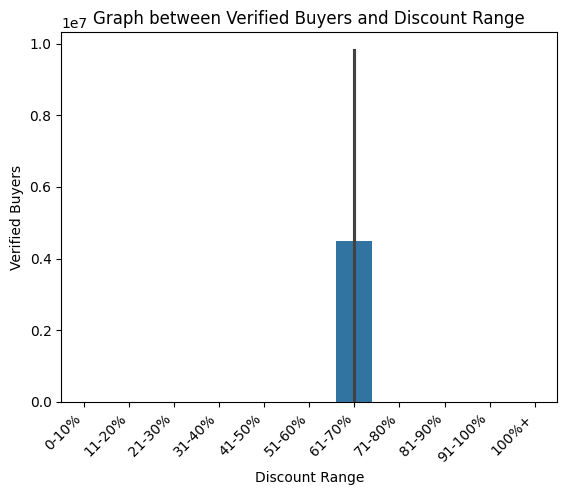

In [59]:
sns.barplot(x=sum_verified_by_price_range['Discount Range'],y=sum_verified_by_price_range['Verified Buyers'],data= sum_verified_by_price_range)
plt.xticks(rotation=45, ha = 'right')
plt.title('Graph between Verified Buyers(sales) and Discount Range')
plt.show()

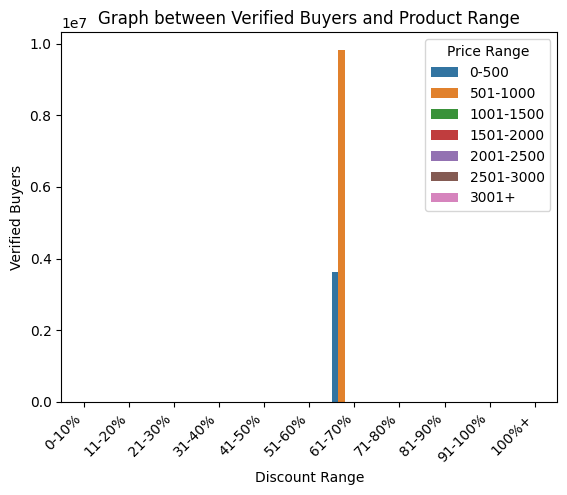

In [60]:
sns.barplot(x='Discount Range',y='Verified Buyers',data= sum_verified_by_price_range,hue=sum_verified_by_price_range['Price Range'],width=1)
plt.xticks(rotation=45, ha = 'right')
plt.title('Graph between Verified Buyers(sales) and Product Range')
plt.show()

CONCLUSION - From the graph we can see that customers are interested in low range products .

### VERIFIED BUYERS VS PRODUCT RATING

In [61]:
result[['Product Rating','Discount Range','Price Range']]

,Product Rating,Discount Range,Price Range
0,4.2,61-70%,501-1000
1,4.5,61-70%,501-1000
4,4.1,61-70%,501-1000
6,4.3,41-50%,1001-1500
7,4.4,11-20%,501-1000
...,...,...,...
94632,4.5,71-80%,0-500
94667,4.4,71-80%,0-500
94682,4.5,71-80%,0-500
94717,4.4,71-80%,0-500


In [62]:
sum_verified_by_product_rating = result.groupby('Product Rating')['Verified Buyers'].sum().reset_index()
#print("Sum of Verified Buyers by Price Range:")
#print(sum_verified_by_product_rating)

Sum of Verified Buyers by Price Range:
    Product Rating  Verified Buyers
0              2.1           1144.0
1              2.9           2881.0
2              3.0           5347.0
3              3.1           3011.0
4              3.2           8438.0
5              3.3          20599.0
6              3.4          14817.0
7              3.5         105701.0
8              3.6         109312.0
9              3.7          14382.0
10             3.8         141223.0
11             3.9         368322.0
12             4.0         901336.0
13             4.1        1193621.0
14             4.2        3142502.0
15             4.3        3272404.0
16             4.4        1949388.0
17             4.5        2392532.0
18             4.6         440593.0
19             4.7         117469.0
20             4.8          47950.0
21             4.9          13264.0
22             5.0           4426.0


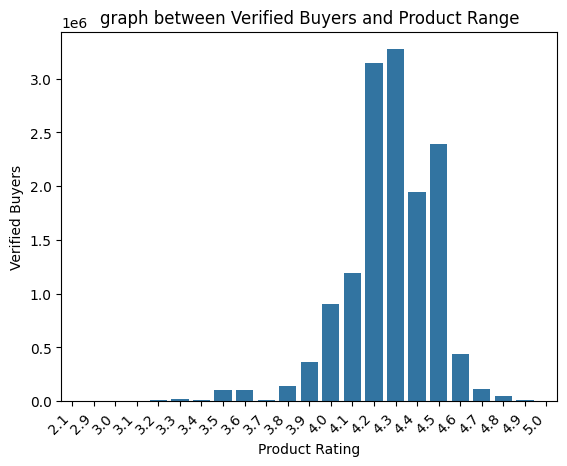

In [63]:
sns.barplot(x=sum_verified_by_product_rating['Product Rating'],y=sum_verified_by_product_rating['Verified Buyers'],data= sum_verified_by_product_rating)
plt.xticks(rotation=45, ha = 'right')
plt.title('Graph between Verified Buyers(sales) and Product Range')   
plt.show() 

CONCLUSION -Most of the  Product rating ranges above 4, meaning customers are satisfied with the quality of the products irrespective of the price range

### FINDING THE TOP 10 POPULAR BRANDS IN THE KID'S SECTION

In [64]:
sum_verified_by_brands = result.groupby('Product Brand')['Verified Buyers'].sum().reset_index()

print("Sum of Verified Buyers by Price Range:")
print(sum_verified_by_brands)

Sum of Verified Buyers by Price Range:
       Product Brand  Verified Buyers
0           A.T.U.N.         113531.0
1           ADDYVERO          17372.0
2    AMIRTHA FASHION           3179.0
3                AND           3712.0
4                AV2             26.0
..               ...              ...
135           misbis            353.0
136        pspeaches        1426761.0
137        toothless           2519.0
138        uppercase           5016.0
139              x2o        1078939.0

[140 rows x 2 columns]


In [65]:
top_10_brands = sum_verified_by_brands.nlargest(10, 'Verified Buyers')
top_10_brands

,Product Brand,Verified Buyers
124,YK Disney,1586814.0
136,pspeaches,1426761.0
139,x2o,1078939.0
42,H&M,949516.0
118,VASTRAMAY,739720.0
12,BAESD,685758.0
103,Stuffie Land,657160.0
20,Bitiya by Bhama,639061.0
116,Urbano Juniors,546250.0
43,HELLCAT,497891.0


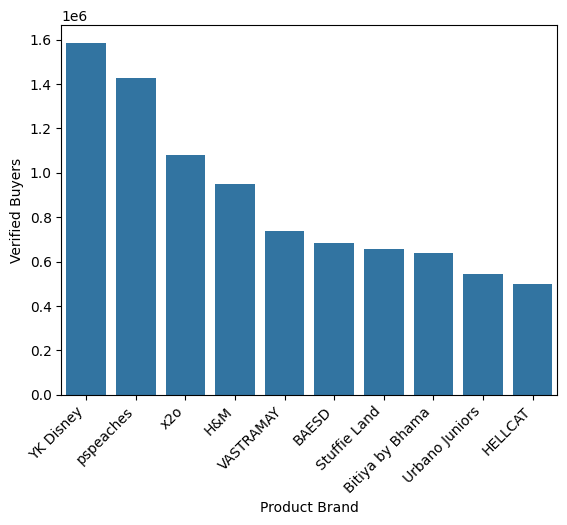

In [66]:
sns.barplot(x=top_10_brands['Product Brand'],y=top_10_brands['Verified Buyers'])
plt.xticks(rotation=45,ha='right')
plt.show()

CONCLUSION - Yk Disney brand is most popular among kids, showing that love for the Disney  is still strong among kids.

### FINDING THE MOST POPULAR PRODUCTS IN THE WOMEN SECTION

In [67]:
sum_verified_by_product_type = result.groupby('Product Name')['Verified Buyers'].sum().reset_index()

print("Sum of Verified Buyers by Price Range:")
print(sum_verified_by_product_type)

Sum of Verified Buyers by Price Range:
                                       Product Name  Verified Buyers
0                          Belted Fit & Flare Dress           2376.0
1                        Boys 2-Pack Pull-On Shorts          23095.0
2                           Boys 3  Printed T-shirt           1100.0
3                     Boys 3 Marvel Cotton T-shirts         140000.0
4                    Boys 5 Mickey & Friends Shorts            976.0
..                                              ...              ...
473     Unisex Kids Pack Of 6 Assorted Basic Briefs           2499.0
474                  Unisex Kids Printed Sweatshirt          24128.0
475  Unisex Kids Self-Design Skinny-Fit Thermal Set            721.0
476                          Unisex Kids Sweatshirt           7135.0
477                            V-Neck Lehenga Choli            164.0

[478 rows x 2 columns]


In [68]:
top_10_products = sum_verified_by_product_type.nlargest(10, 'Verified Buyers')
top_10_products

,Product Name,Verified Buyers
151,Floral A-Line Cotton Dress,1049400.0
20,Boys Cotton Printed T-shirt,760000.0
89,Boys Printed Kurta with Dhoti Pants,625800.0
261,Girls Pack Of 3 Printed Tshirt,538200.0
88,Boys Printed Kurta Set,431411.0
72,Boys Pack of 3 Outdoor Shorts,423931.0
386,Kids Pack of 5 Lounge Pants,400000.0
119,Boys Slim Fit Jeans,382269.0
68,Boys Pack Of 5 Disney Shorts,271870.0
431,Pack Of 3 Regular Shorts,248000.0


After we find the most popular products  using these exploratory analytics techniques,  we can use the ML algorithm  to  find out similar trendy items of these products. The comapny can analyse the product diversity of the similar items and enrich, enhance customer experience by adding more such on-demand clothing. The ML algorithm is shown in trend-myntra-sale.py file.